## Principal Component Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

## Контекст

В рамках проекта по автоматическому распознаванию изображений для почтовой компании рассматривается задача идентификации рукописных цифр. В настоящее время адресные данные на почтовых отправлениях часто содержат рукописные индексы, и автоматическое распознавание этих символов существенно повышает эффективность обработки корреспонденции. Современные системы машинного обучения, основанные на распознавании образов, демонстрируют точность, превосходящую человеческие возможности.

С целью повышения качества распознавания руководство компании заинтересовано в выявлении цифр, которые представляют наибольшую сложность для автоматической классификации. Это позволит целенаправленно собрать дополнительную размеченную информацию именно для таких случаев, что в свою очередь улучшит обобщающую способность модели.

Для решения поставленной задачи планируется использование одного из наиболее известных открытых наборов данных с изображениями рукописных цифр. С применением метода главных компонент (PCA) будет проведён анализ распределения классов цифр в пониженной размерности. Это позволит определить, какие цифры обладают высокой степенью различимости, а какие — значительным пересечением в признаковом пространстве, что свидетельствует о сложности их распознавания.

Полученные результаты будут использованы для формирования рекомендаций по расширению обучающей выборки и корректировке стратегии обучения модели.

Источник данных: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [2]:
digits = pd.read_csv('D:/Machine Learning/Новая папка/_DATA/digits.csv')

In [3]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Создание датафрейма, содержащего только значения для пикселей.

In [4]:
pixels = digits.drop('number_label',axis=1)
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## Вывод изображения на экран.

Каждая строка датафрейма — это отдельное изображение.

In [5]:
# 1ая строка датафрейма pixels
first_image = pixels.iloc[0]
first_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

Преобразование вектора признаков в реальное изображение 8×8 пикселей.

In [6]:
np.array(first_image)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
number = np.array(first_image).reshape(8,8)
number

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Отображение изображения с помощью matplotlib.imshow()

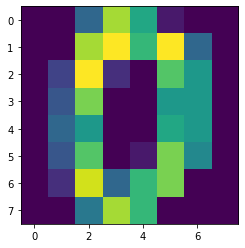

In [8]:
plt.imshow(number)
plt.show()

Исходное изображение является черно-белым, поэтому следует изменить палитру.

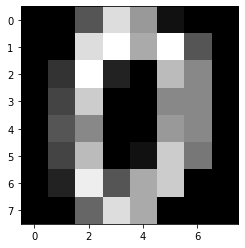

In [9]:
plt.imshow(number, cmap='gray')
plt.show()

Визуализация интенсивности пикселей:  

- 0 означает чёрный (пустой, фон),  
- 16 — белый (максимально яркий пиксель),  
- значения между ними — разные степени серого.  

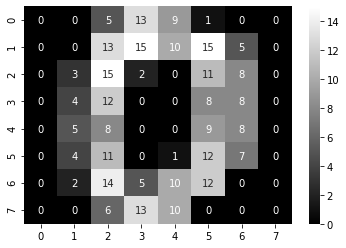

In [10]:
sns.heatmap(number,annot=True,cmap='gray')
plt.show()

Усреднённое изображение цифры "0"

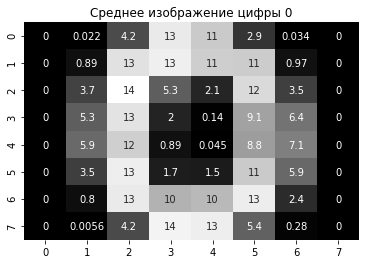

In [11]:
pixels = digits.drop(columns=['number_label'])  # только пиксельные данные
labels = digits['number_label']                 # метки цифр

zeros = pixels[labels == 0]

# Вычисление среднего по каждому пикселю
mean_zero = zeros.mean(axis=0).values.reshape(8, 8)

sns.heatmap(mean_zero, annot=True, cmap='gray', cbar=False)
plt.title('Среднее изображение цифры 0')
plt.show()

## Масштабирование данных

In [12]:
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## Метод главных компонент (PCA - Principal Component Analysis)

In [13]:
pca_model = PCA(n_components=2)
pca_pixels = pca_model.fit_transform(scaled_pixels)

Две главные компоненты объясняют приблизительно 22% общей дисперсии данных.

In [14]:
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [15]:
sum(pca_model.explained_variance_ratio_)

0.2159497048936893

## Визуализация результатов модели для 2х главных компонент.

**Диаграмма рассеяния, отображающая цифры в двумерном пространстве главных компонент.**

- Цифры, обладающие высокой степенью различимости: 2, 4, 6, возможно, 7.  
- Остальные цифры характеризуются значительным пересечением в признаковом пространстве, что свидетельствует о сложности их распознавания. Для них уменьшение до 2х компонент выглядит нежелательным. 

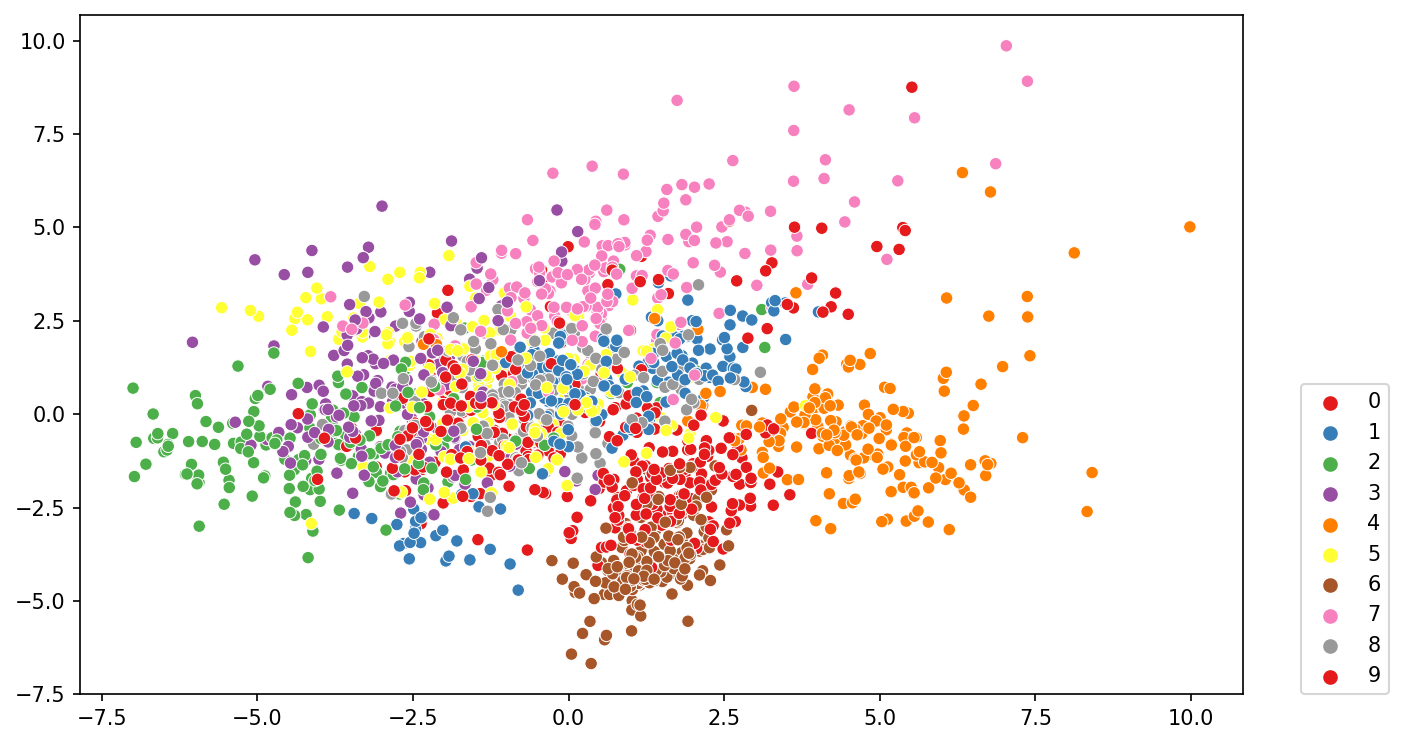

In [16]:
plt.figure(figsize=(10,6),dpi=150)
labels = digits['number_label'].values
sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0));

## Визуализация результатов модели для 3х главных компонент.

**Интерактивная трёхмерная визуализация результатов применения метода главных компонент с использованием трёх основных компонент.**

На 3х мерной визуализации наблюдается приблизительно такая же степень перекрытия:  
Цифры, обладающие высокой степенью различимости: 2, 4, 6, возможно, 7.  
Остальные цифры характеризуются значительным пересечением в признаковом пространстве, что свидетельствует о сложности их распознавания.

In [17]:
pca_model = PCA(n_components=3)
pca_pixels = pca_model.fit_transform(scaled_pixels)

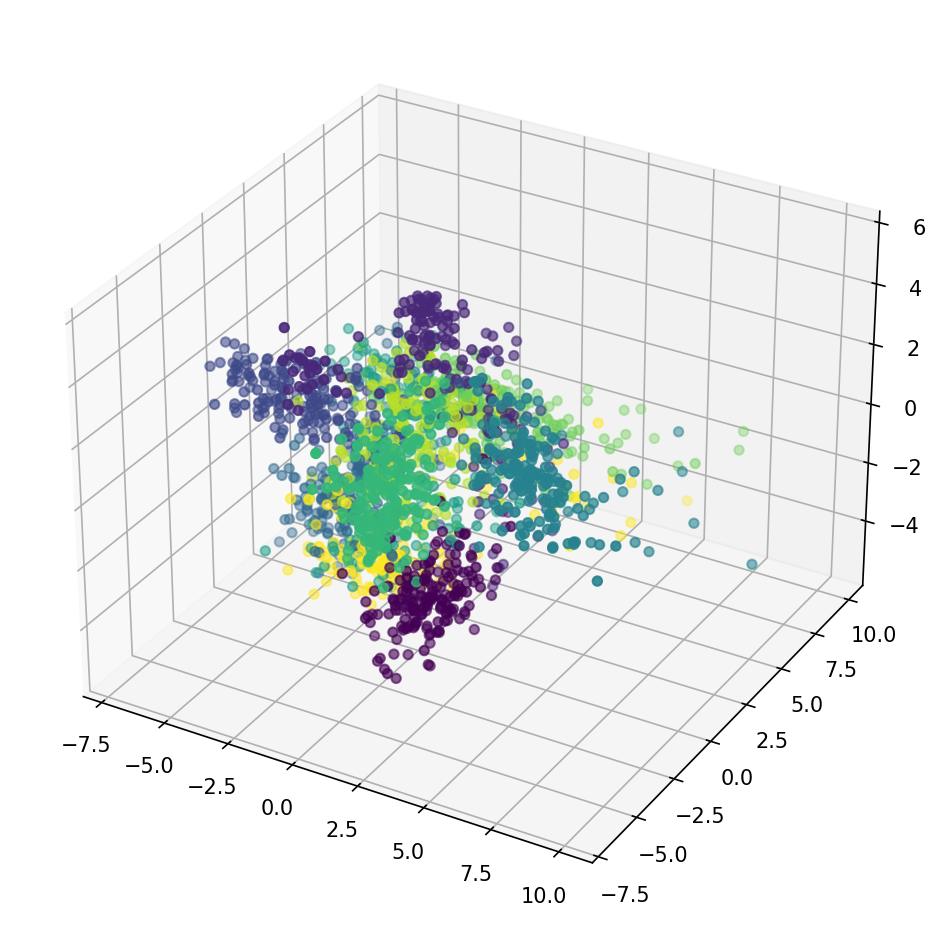

In [18]:
plt.figure(figsize=(8,8),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);

<IPython.core.display.Javascript object>


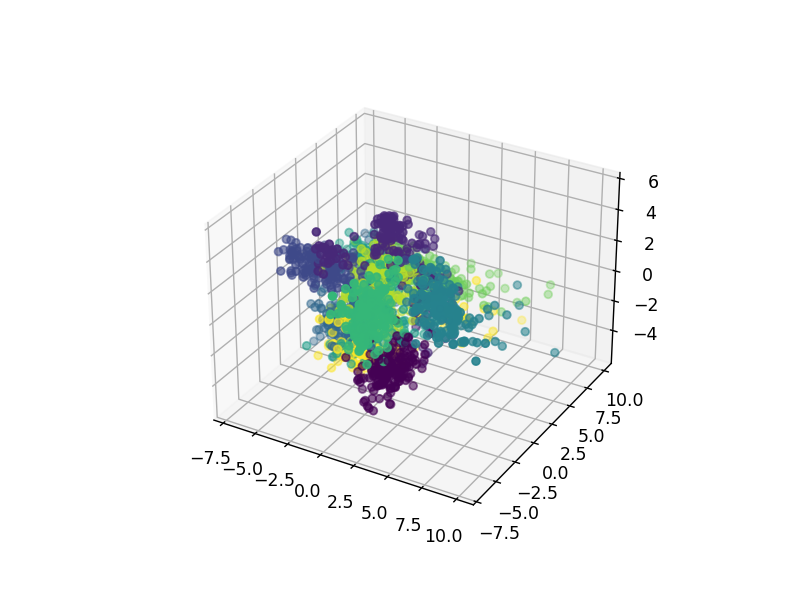

<IPython.core.display.Javascript object>


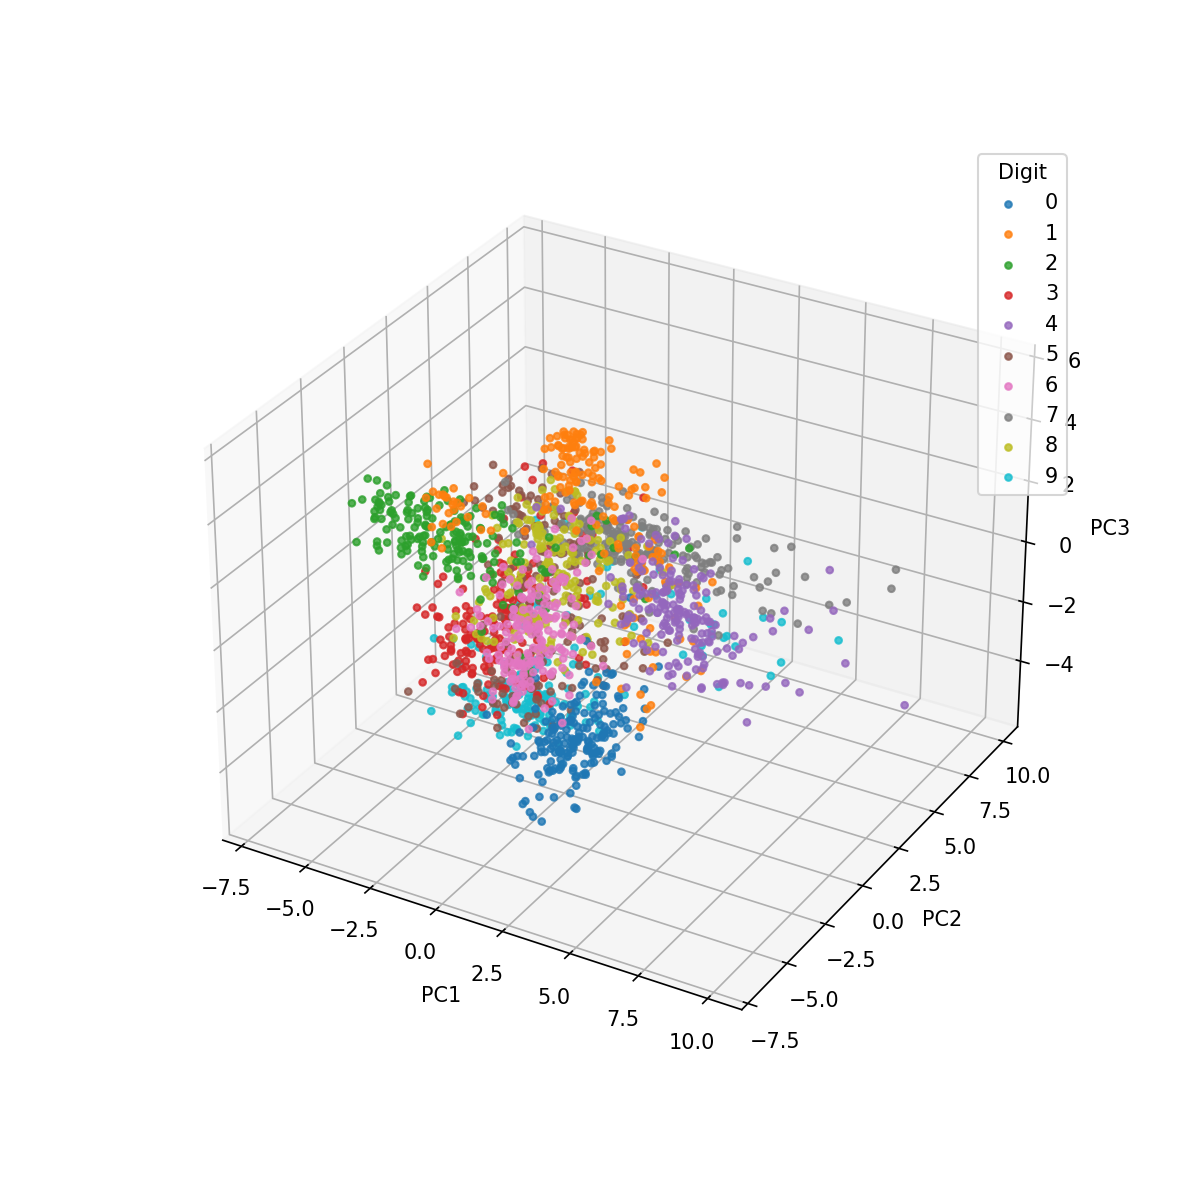

In [19]:
%matplotlib notebook

ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);
labels = np.unique(digits['number_label'])
colors = plt.cm.tab10(np.linspace(0, 1, len(labels))) 

fig = plt.figure(figsize=(8,8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

for lbl, col in zip(sorted(labels), colors):
    mask = digits['number_label'] == lbl
    ax.scatter(
        pca_pixels[mask, 0], pca_pixels[mask, 1], pca_pixels[mask, 2],
        color=col, label=str(lbl), s=10, alpha=0.8
    )

ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
ax.legend(title='Digit', loc='upper right')
plt.show()